JESUJUWON EGBEWALE ASSIGNMENT

DOWNLOADING THE DATA

In [7]:
# dataframe and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. load the dataset


In [8]:

train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
ss = pd.read_csv("SampleSubmission.csv")

variables = pd.read_csv("VariableDefinitions.csv")

In [9]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
test.head(6)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
5,Kenya,2018,uniqueid_6074,Rural,Yes,4,25,Female,Spouse,Married/Living together,Primary education,Self employed


In [11]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [12]:
test.describe()

,year,household_size,age_of_respondent
count,10086.000000,10086.000000,10086.000000
mean,2016.975907,3.778802,38.308348
std,0.847356,2.212721,16.270053
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,20.000000,100.000000


from the result we have 13 variables in the dataset, 12 independent variables and 1 dependent variable for the train dataset, while no inddependent variable in the test dataset.

In [13]:
#to observe the shape of the data
print("train data shape :", train.shape)

#the result is to determine the numbwer of rows and columns

train data shape : (23524, 13)


In [14]:
print("test data shape :", test.shape)

test data shape : (10086, 12)


In [15]:
# to check for missing values
print("missing values:", train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


from the result above, no missing values

In [16]:
train.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [25]:
import seaborn as sns
import lightgbm as lgb


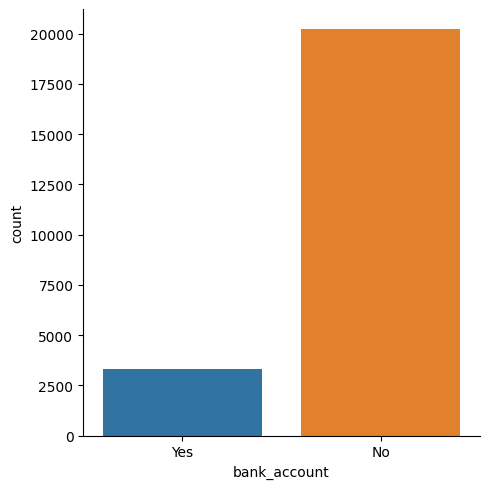

In [18]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train)

In [19]:
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [21]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [22]:
#this gives the count of each category in that Target variable.
train['bank_account'].value_counts() 

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

exploring the distribution

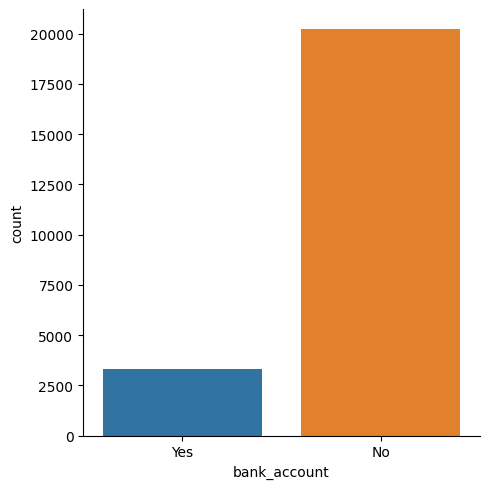

In [24]:
sns.catplot(x="bank_account", kind="count", data= train)

The data above confirms that the number of people without an account is more than those who does.

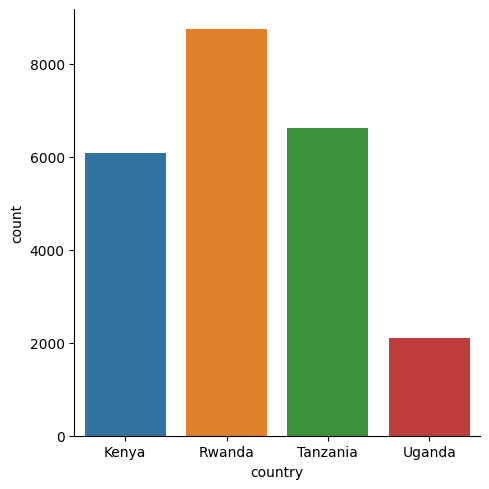

In [27]:
sns.catplot(x="country", kind="count", data=train)

#exploring the data country wise

we have more people from Rwanda and less from Uganda who filled the questionnaire

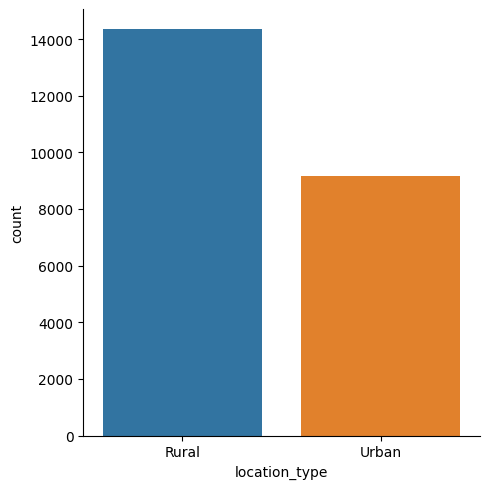

In [29]:
sns.catplot(x="location_type", kind="count", data=train)

the data have more people from the Rural area compare to the Urban

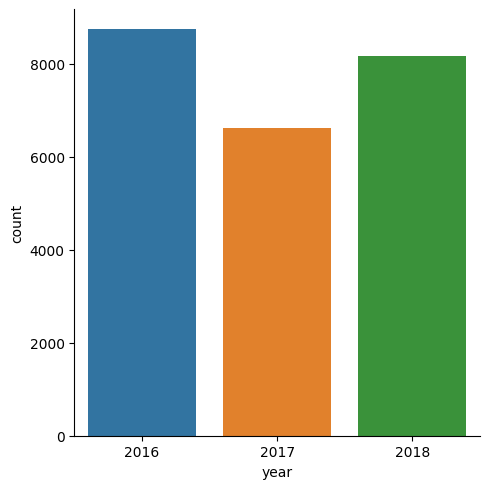

In [30]:
sns.catplot(x="year", kind="count", data=train)

the data waas gotten from 2016 - 2018, even though 2016 have the highest count


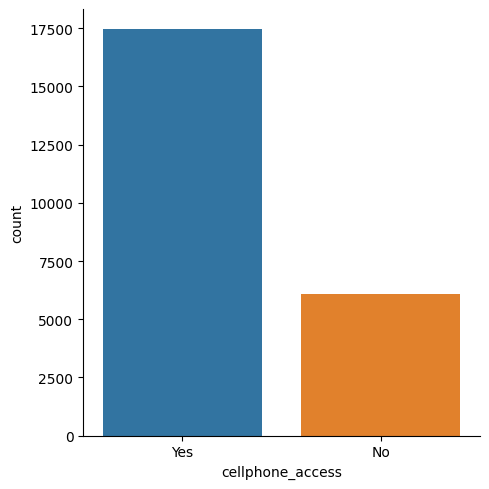

In [31]:
sns.catplot(x="cellphone_access", kind="count", data=train)

those who have acces to mobile phjones are more

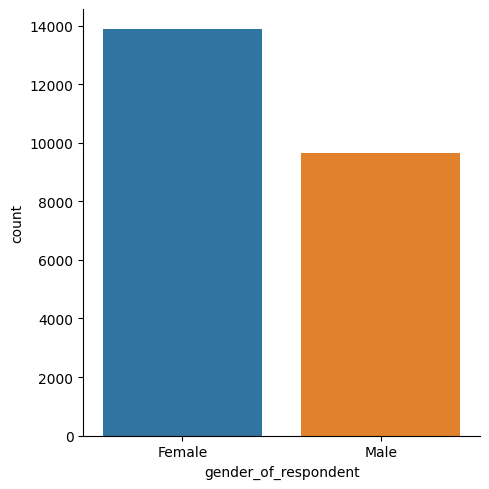

In [32]:
sns.catplot(x="gender_of_respondent", kind="count", data=train)

we have more female than male

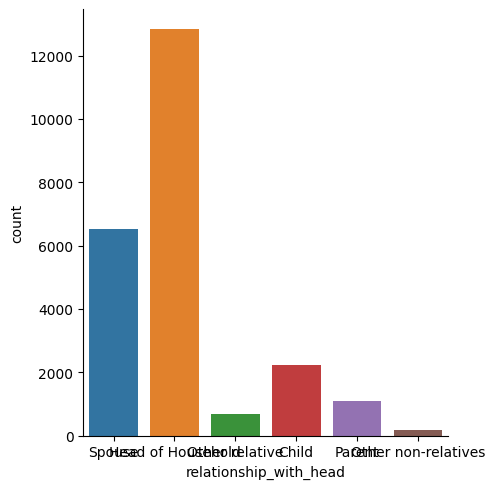

In [33]:
sns.catplot(x="relationship_with_head", kind="count", data=train)


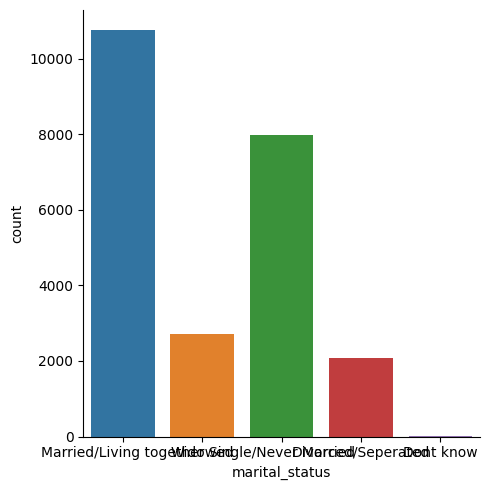

In [33]:
sns.catplot(x="marital_status", kind="count", data=train)

we have more data from Married

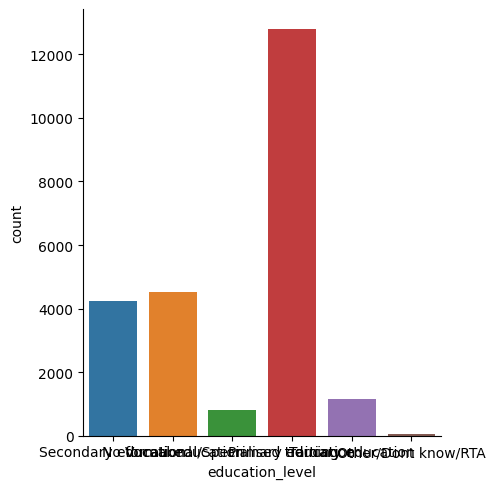

In [34]:
sns.catplot(x="education_level", kind="count", data=train)

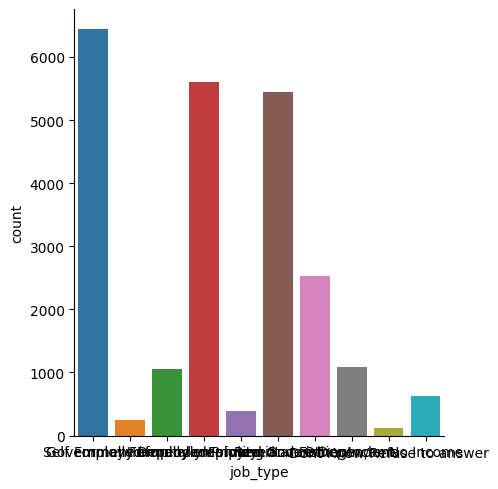

In [35]:
sns.catplot(x="job_type", kind="count", data=train)

Text(0.5, 0, 'Household  size')

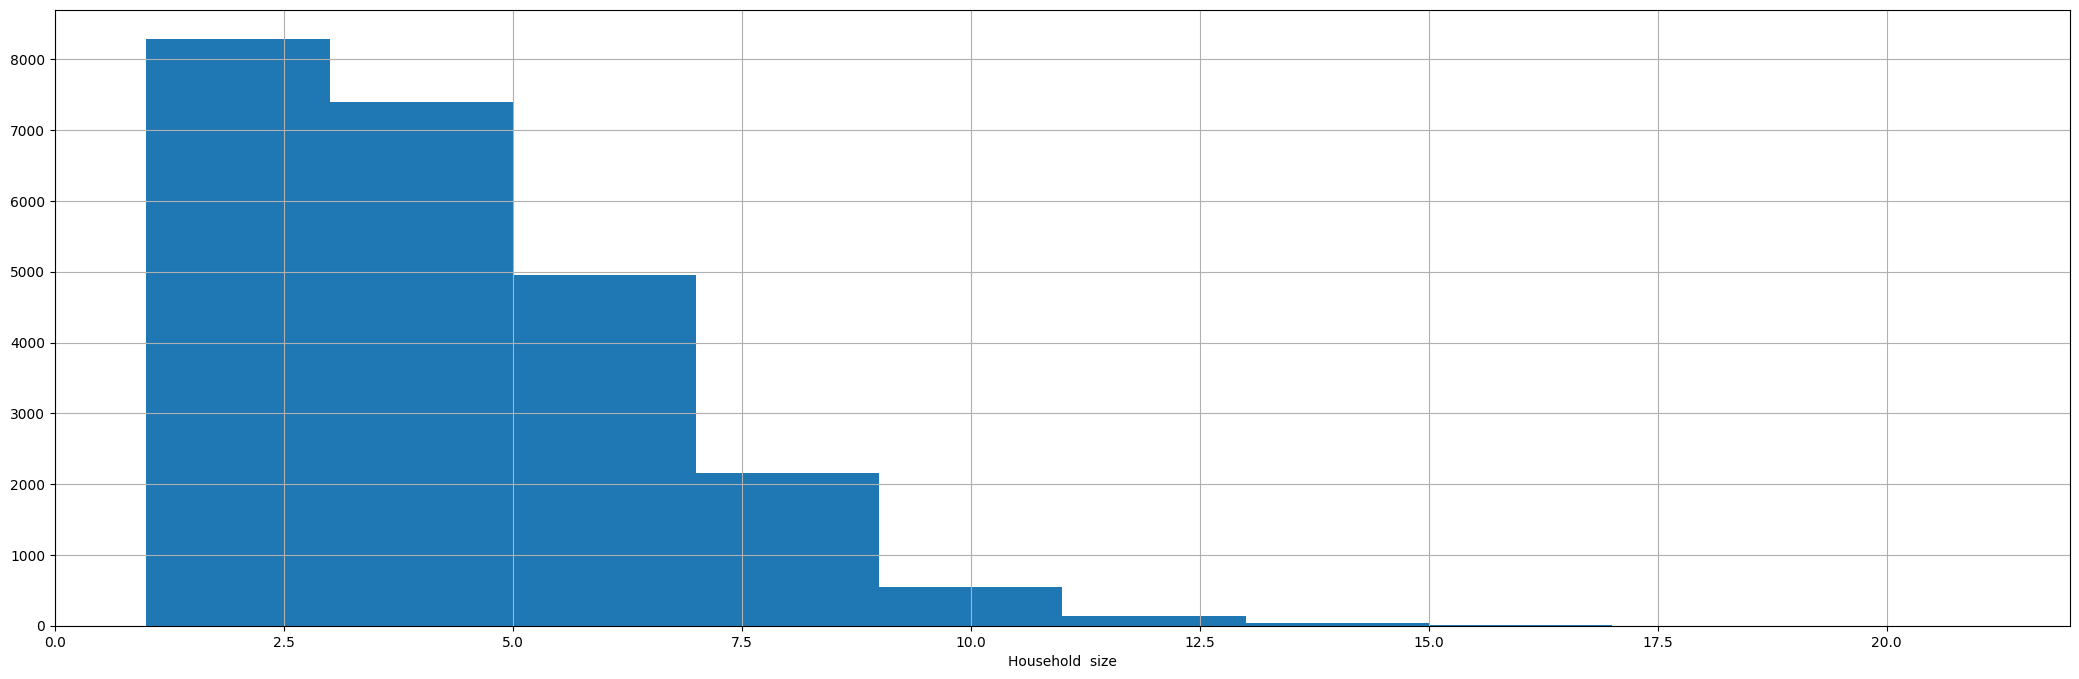

In [36]:
plt.figure(figsize=(26, 8))
train.household_size.hist() 
plt.xlabel("Household  size")

Text(0.5, 0, 'Age of Respondent')

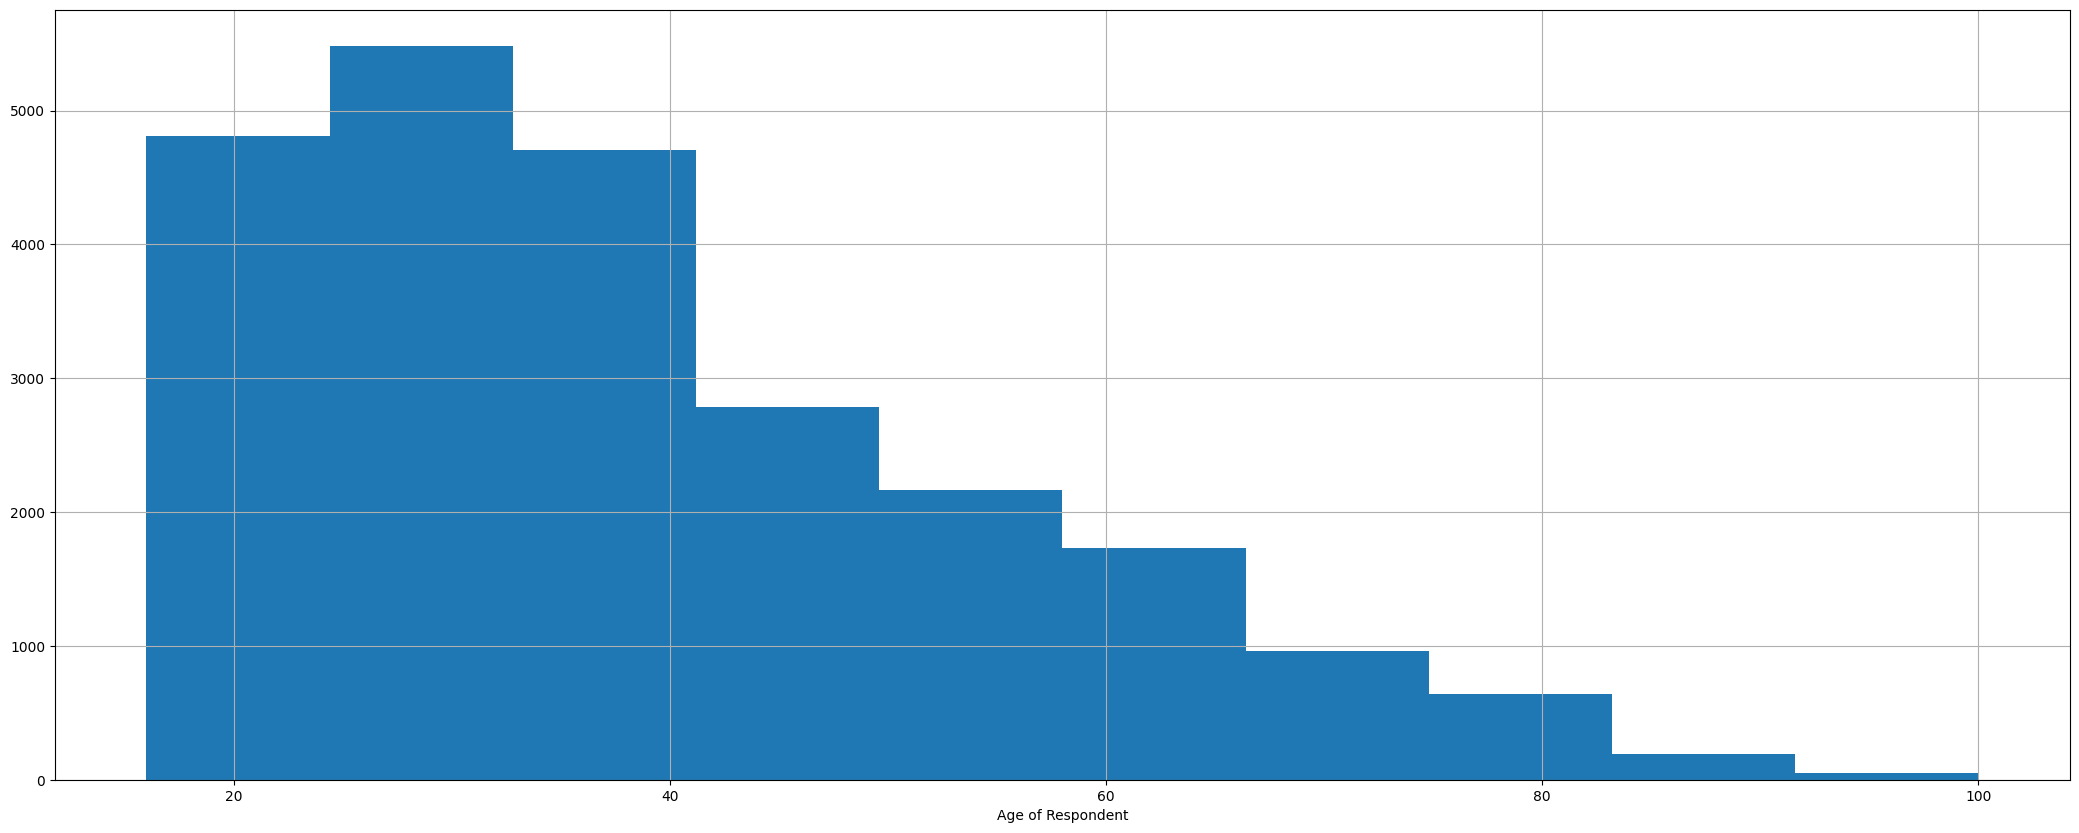

In [37]:
plt.figure(figsize=(26, 10))
train.age_of_respondent.hist() 
plt.xlabel("Age of Respondent")

<Axes: xlabel='job_type', ylabel='count'>

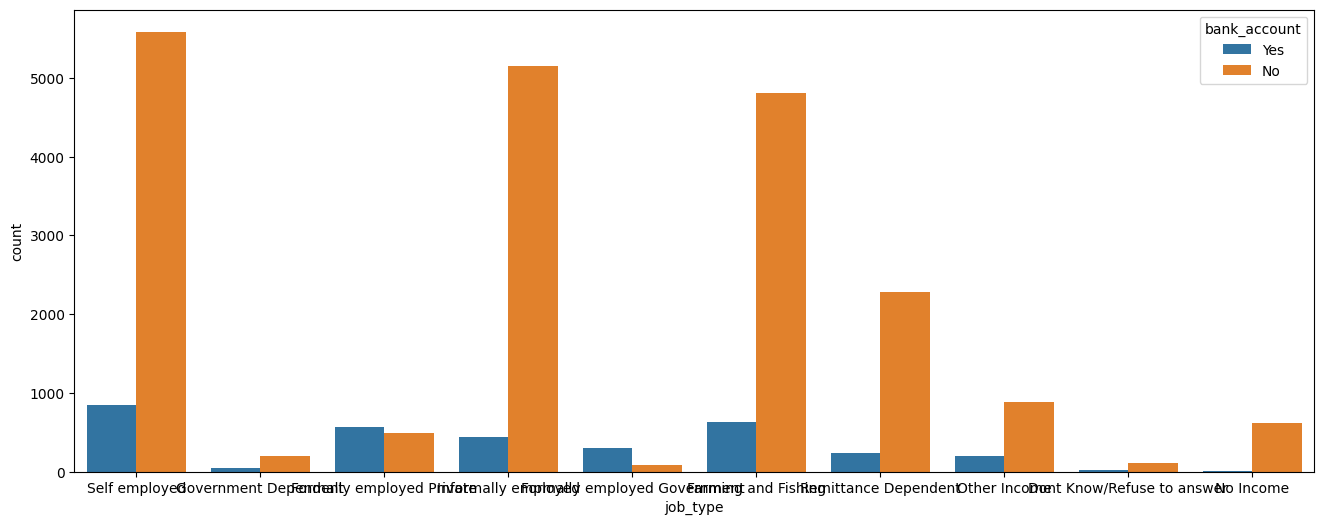

In [38]:
plt.figure(figsize=(16, 6))
sns.countplot(x="job_type", hue="bank_account", data=train)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [41]:
label = "bank_account"

#Drop rows with no data
sam_data = train.dropna(subset = [label])


#checking if the number make sense
sam_data[[label]].describe()



,bank_account
count,23524
unique,2
top,No
freq,20212


In [42]:
# Convert target label to numerical Data
lablencoder = LabelEncoder()

train["bank_account"] = lablencoder.fit_transform(train["bank_account"])

train



,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,0,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,0,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,0,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [43]:
#Separate training features from target
x_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [44]:
train[[label]].describe()

,bank_account
count,23524.000000
mean,0.140792
std,0.347815
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [45]:
y_train = train[label].values

print("Labels : ", y_train[:9])

Labels :  [1 0 1 0 0 0 0 0 1]


SyntaxError: unmatched ']' (2343792714.py, line 1)

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

def preprocessing_data(train):
    numeric_cols = ["household_size", "age_of_respondent", "year"]

    # categorical features to be converted to One Hot Encoding
    categorical_cols = ["relationship_with_head", "marital_status", "education_level", "job_type", "country"]

    # Apply one-hot encoding to categorical columns
    encoder = OneHotEncoder(handle_unknown='ignore')
    train_encoded = encoder.fit_transform(train[categorical_cols])

    # Scale the numeric columns
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train[numeric_cols])

    # Concatenate the scaled numeric columns and the one-hot encoded categorical columns
    train_processed = np.concatenate([train_scaled, train_encoded.toarray()], axis=1)

    return train_processed



In [48]:
# preprocess the train data 

processed_train = preprocessing_data(train)

processed_test = preprocessing_data(test)

observing the shape of the train data set


In [49]:
print(processed_train.shape)

(23524, 34)


In [50]:
print(processed_train[:1])

[[0.1       0.0952381 1.        0.        0.        0.        0.
  0.        1.        0.        0.        1.        0.        0.
  0.        0.        0.        1.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        1.        1.        0.        0.        0.       ]]


from the data above, we now have 37 variables, but not all are fit to use we only need to select the best of all.

In [51]:
import sklearn.model_selection


In [52]:
sam_data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [53]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

In [54]:
#import classifier algorithm here us9ng xgboost

from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model= xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.11049723756906082


<Axes: >

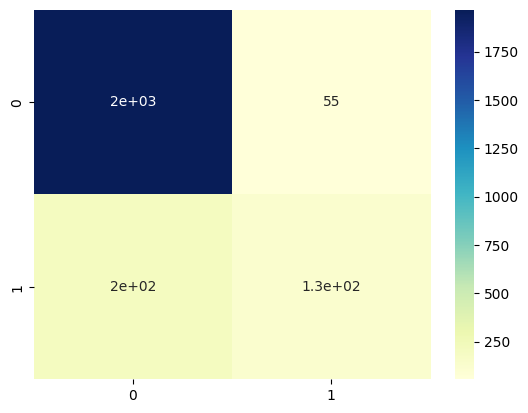

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_val, xg_model.predict(X_Val))
sns.heatmap(cm, annot=True, cmap="YlGnBu")


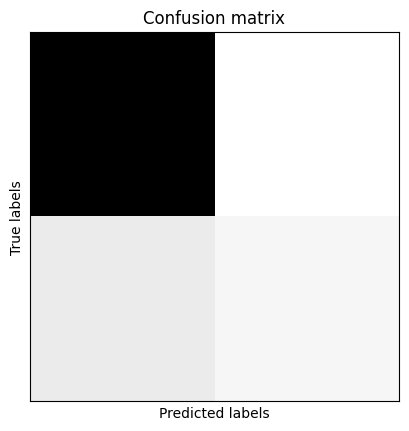

In [73]:
from sklearn.metrics import confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_val, xg_model.predict(X_Val))

# Plot confusion matrix using Matplotlib
plt.imshow(cm, cmap='binary')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix')
plt.show()


In [91]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10], 'gamma': [0.5, 1], 'subsample': [0.6, 0.8, 1.0], 'max_depth': [3, 5]}

my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)

my_xgb_model.fit(X_Train, y_Train)

print(my_xgb_model.best_params_)        

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[12:35:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

{'gamma': 1, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 0.8}


In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)

y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.10837229069273269


In [93]:
# Get the predicted result for the test Data
test.bank_account = xgb_model.predict(processed_test)

C:\Users\Hp\AppData\Local\Temp\ipykernel_14000\4179094782.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.bank_account = xgb_model.predict(processed_test)


In [94]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"], "bank_account": test.bank_account})

In [95]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
9369,uniqueid_2286 x Uganda,0
3147,uniqueid_9282 x Rwanda,0
7260,uniqueid_7535 x Tanzania,0
4247,uniqueid_10382 x Rwanda,0
9983,uniqueid_2900 x Uganda,0
